<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
#import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
hr = pd.read_csv('data/employee_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


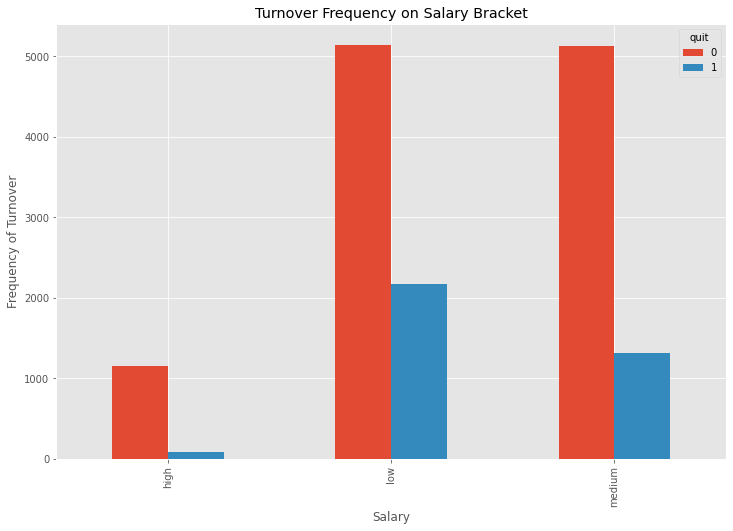

In [5]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title("Turnover Frequency on Salary Bracket")
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

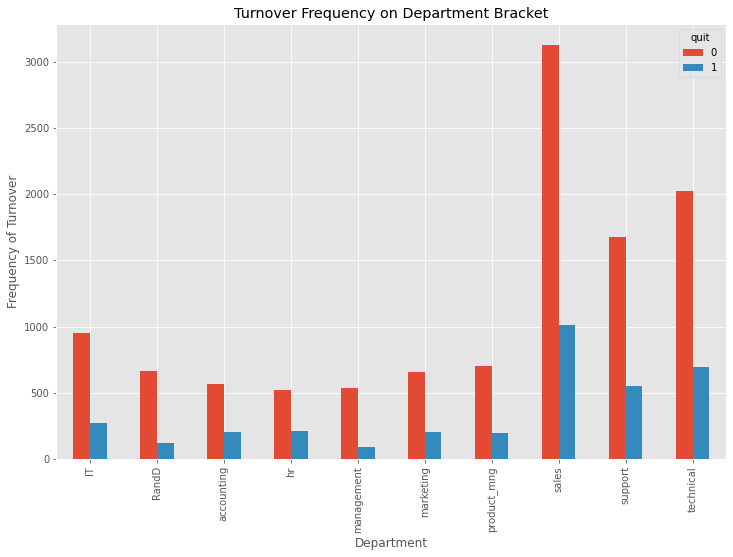

In [6]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title("Turnover Frequency on Department Bracket")
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

In [7]:
cat_vars = ['department','salary']
for var in cat_vars:
    cat_list = pd.get_dummies(hr[var],prefix=var)
    hr = hr.join(cat_list)

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [9]:
hr.drop(columns=['department','salary'],axis=1,inplace=True)

In [10]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

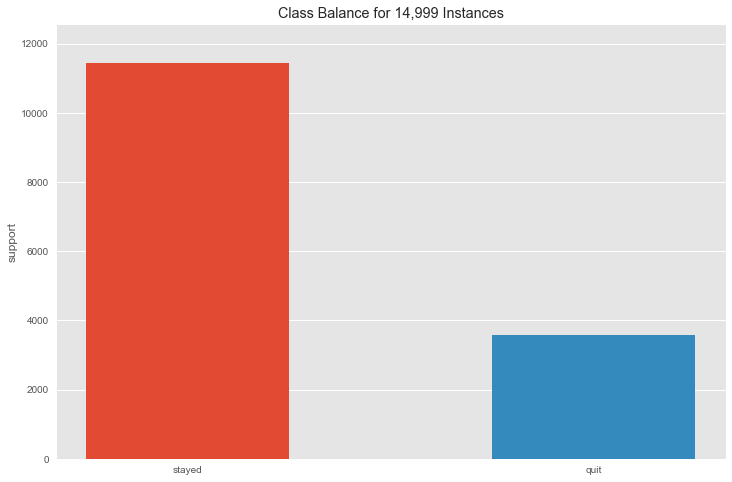

<AxesSubplot:title={'center':'Class Balance for 14,999 Instances'}, ylabel='support'>

In [12]:
visualizer = ClassBalance(labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

In [13]:
X = hr.loc[:,hr.columns!='quit']
y = hr.quit

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [16]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=10,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                      criterion=crit,
                                      splitter=split,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf)
    estimator.fit(X_train,y_train)
    print('Decision Tree Training Accuracy : {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))
                                                           ))
    print('Decision Tree test Accuracy : {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator
    
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [17]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = RandomForestClassifier(random_state=1,
                                      criterion=crit,
                                      bootstrap=bootstrap,
                                      n_estimators=forests,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf = min_leaf,
                                      n_jobs=1,
                                      verbose=False)
    estimator.fit(X_train,y_train)
    
    
    print('Random forest Training Accuracy : {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))
                                                           ))
    print('Random Forest test Accuracy : {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('Visualizing the first tree heree')
    graph = Source(tree.export_graphviz(num_tree
                                        ,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Feature Importance and Evaluation Metrics
---

In [18]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

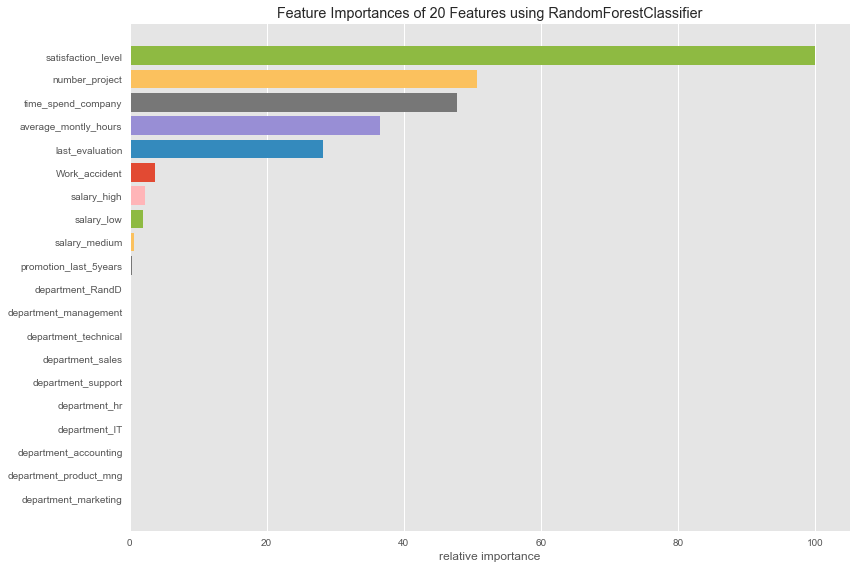

<AxesSubplot:title={'center':'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [19]:
rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)
viz = FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show()

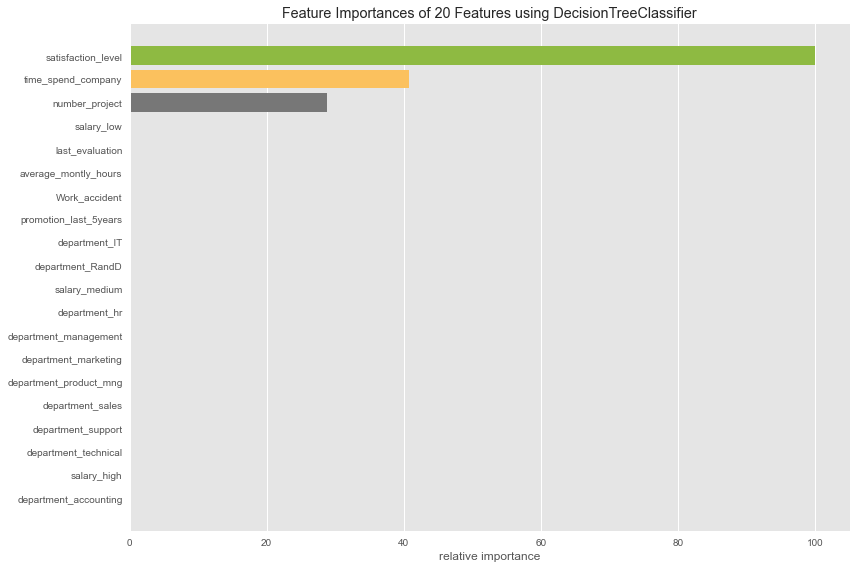

<AxesSubplot:title={'center':'Feature Importances of 20 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [20]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train,y_train)
viz.show()


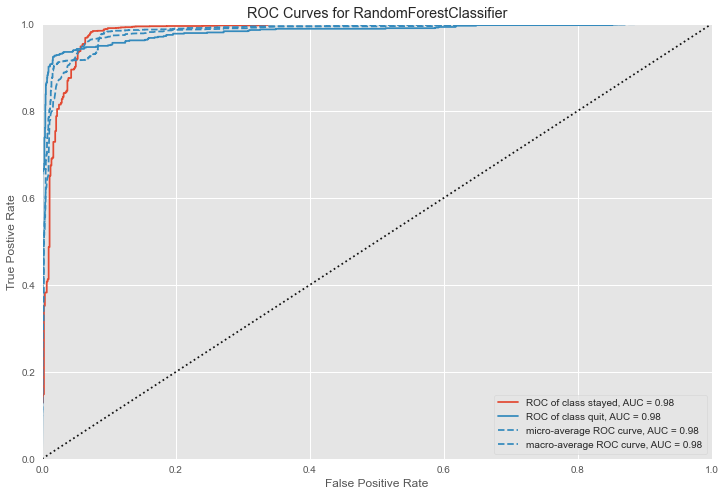

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [21]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

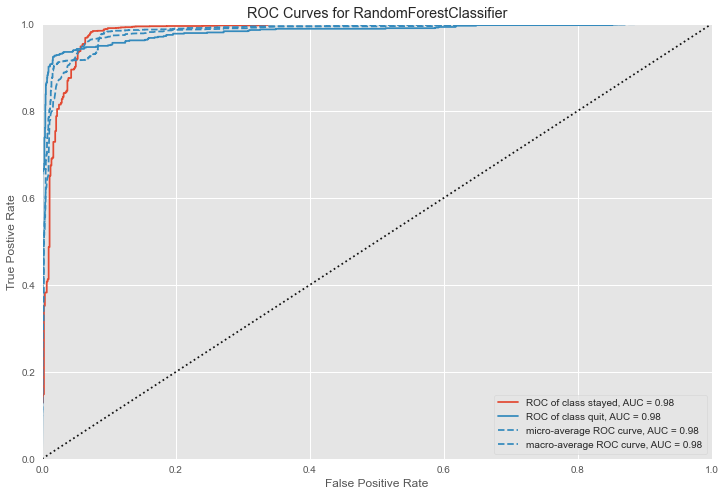

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [22]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()